In [ ]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import plotly.express as px # type: ignore


In [188]:
# Load the unemployment data from a CSV file
df = pd.read_csv(r'C:\Users\Kavisha\Downloads\Unemolyment_in_india_dataset.csv')

In [189]:
# Display the first few rows of the dataset
#print(df.head())
df.sample(5)

,Region,Date,Frequency,Unemployment Rate,Estimated Employed,Labor Force,Area,Year,Day,Month
510,Jammu & Kashmir,30-06-2019,Monthly,19.88,1139815.0,45.17,Urban,2019.0,30.0,6.0
257,Rajasthan,31-05-2019,Monthly,4.03,15226005.0,38.52,Rural,2019.0,31.0,5.0
151,Karnataka,30-09-2019,Monthly,3.20,13741892.0,44.45,Rural,2019.0,30.0,9.0
213,Meghalaya,31-03-2020,Monthly,1.28,1192616.0,67.46,Rural,2020.0,31.0,3.0
411,Bihar,31-03-2020,Monthly,15.73,3049637.0,37.29,Urban,2020.0,31.0,3.0


In [190]:
# Check for missing values
print(df.isnull().sum())

Region                 14
Date                   14
 Frequency             14
Unemployment Rate      14
 Estimated Employed    14
Labor Force            14
Area                   14
Year                   14
Day                    14
Month                  14
dtype: int64


In [191]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

In [192]:
print(df['Region'].value_counts())

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64


In [193]:
df.isnull().sum()

Region                 14
Date                   14
 Frequency             14
Unemployment Rate      14
 Estimated Employed    14
Labor Force            14
Area                   14
Year                   14
Day                    14
Month                  14
dtype: int64

In [194]:
df.duplicated().sum()

13

In [195]:
# If there are missing values, handle them (e.g., by filling or dropping)
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

C:\Users\Kavisha\AppData\Local\Temp\ipykernel_14020\441858423.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [196]:
print('row count =>',df.shape[0])
print('column count =>',df.shape[1])

row count => 754
column count => 10


In [197]:
# Convert the 'Year' column to datetime if it's in string format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Adjust if it's in a different format
# Check the data types of the columns
print(df.dtypes)

Region                         object
Date                           object
 Frequency                     object
Unemployment Rate             float64
 Estimated Employed           float64
Labor Force                   float64
Area                           object
Year                   datetime64[ns]
Day                           float64
Month                         float64
dtype: object


In [198]:
# Summary statistics
print(df.describe())

       Unemployment Rate   Estimated Employed  Labor Force  \
count         754.000000         7.540000e+02   754.000000   
mean           11.660796         7.464805e+06    42.589456   
min             0.000000         4.942000e+04    13.330000   
25%             4.692500         1.227446e+06    38.167500   
50%             8.135000         4.825595e+06    41.035000   
75%            15.720000         1.152000e+07    45.390000   
max            76.740000         4.577751e+07    72.570000   
std            10.661370         8.233269e+06     8.040783   

                                Year         Day       Month  
count                            754  754.000000  754.000000  
mean   2019-06-06 20:14:38.514588928   30.493369    6.383289  
min              2019-01-01 00:00:00   29.000000    1.000000  
25%              2019-01-01 00:00:00   30.000000    4.000000  
50%              2019-01-01 00:00:00   31.000000    6.000000  
75%              2020-01-01 00:00:00   31.000000    9.000000  


In [199]:
df[["Day", "Month", "Year"]] = df['Date'].str.split("-", expand = True)
df

,Region,Date,Frequency,Unemployment Rate,Estimated Employed,Labor Force,Area,Year,Day,Month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019,31,05
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019,30,06
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019,31,07
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019,31,08
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019,30,09
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,2020,29,02
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,2020,31,03
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,2020,30,04
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,2020,31,05


In [200]:
df.drop(columns=[' Frequency'],axis=1,inplace=True)

In [201]:
print(df.head())  # Display the first few rows
print(df.info())  # Show the data types of each column
print(df.columns)

           Region         Date  Unemployment Rate   Estimated Employed  \
0  Andhra Pradesh   31-05-2019               3.65           11999139.0   
1  Andhra Pradesh   30-06-2019               3.05           11755881.0   
2  Andhra Pradesh   31-07-2019               3.75           12086707.0   
3  Andhra Pradesh   31-08-2019               3.32           12285693.0   
4  Andhra Pradesh   30-09-2019               5.17           12256762.0   

   Labor Force   Area  Year  Day Month  
0        43.24  Rural  2019   31    05  
1        42.05  Rural  2019   30    06  
2        43.50  Rural  2019   31    07  
3        43.97  Rural  2019   31    08  
4        44.68  Rural  2019   30    09  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               754 non-null    object 
 1   Date                 754 non-null    object 
 2   

C:\Users\Kavisha\AppData\Local\Temp\ipykernel_14020\268919970.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




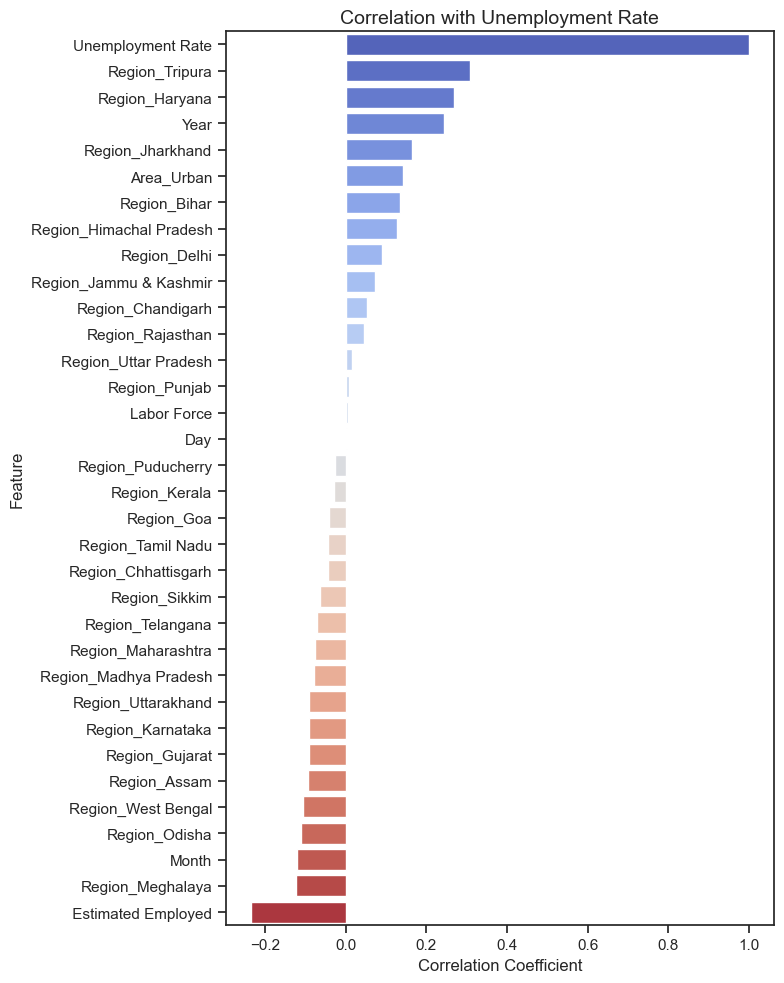

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your correlation matrix is already calculated as 'correlation_matrix'

# Get the correlation of all features with 'Unemployment Rate'
correlation_with_unemployment = correlation_matrix['Unemployment Rate'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))  # Adjust height as needed to fit all features
sns.barplot(x=correlation_with_unemployment, y=correlation_with_unemployment.index, palette='coolwarm')
plt.title('Correlation with Unemployment Rate', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

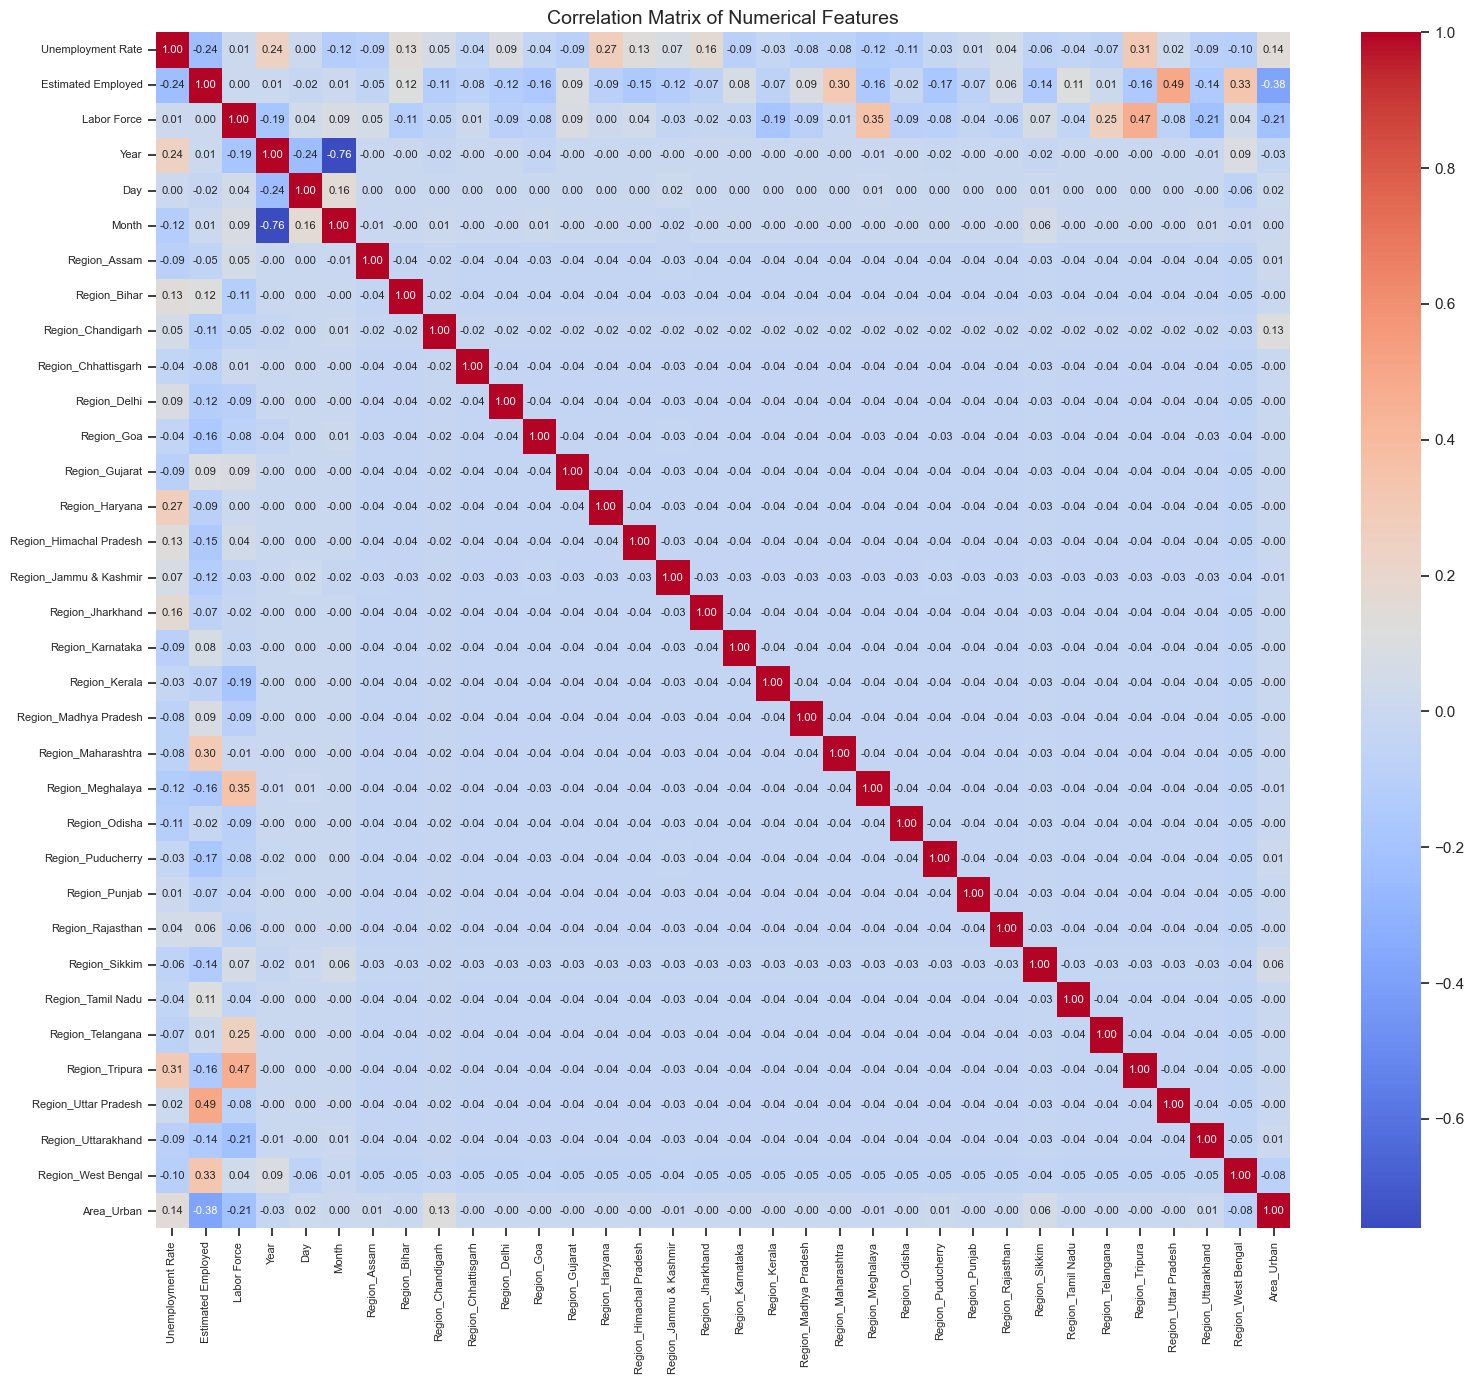

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your 'df_numeric' DataFrame is already created

plt.figure(figsize=(16, 14))  # Adjust figure size as needed
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

Columns in DataFrame:
Index(['Region', 'Date', ' Frequency', 'Unemployment Rate',
       ' Estimated Employed', 'Labor Force', 'Area', 'Year', 'Day', 'Month'],
      dtype='object')


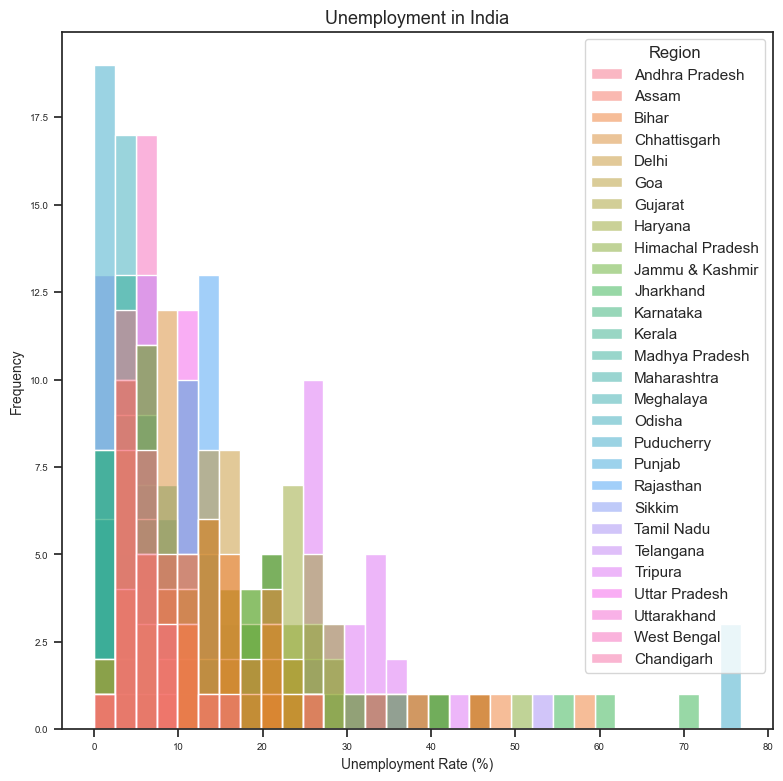

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data - REPLACE 'your_data.csv' WITH THE ACTUAL PATH TO YOUR FILE
df = pd.read_csv(r'C:\Users\Kavisha\Downloads\Unemolyment_in_india_dataset.csv')

# Print the columns to verify 'Region' exists
print("Columns in DataFrame:")
print(df.columns)

# Convert Year, Day, and Month to numeric (if applicable and needed)
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
if 'Day' in df.columns:
    df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
if 'Month' in df.columns:
    df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Now create the histogram with 'Region' as hue
plt.figure(figsize=(8, 8))
plt.title("Unemployment in India", fontsize=13)
sns.histplot(x='Unemployment Rate', hue="Region", data=df, kde=False)
plt.xlabel("Unemployment Rate (%)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.tight_layout()
plt.show()

In [205]:
df.Month.unique()

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4., nan])

<Axes: xlabel='Month', ylabel='Unemployment Rate'>

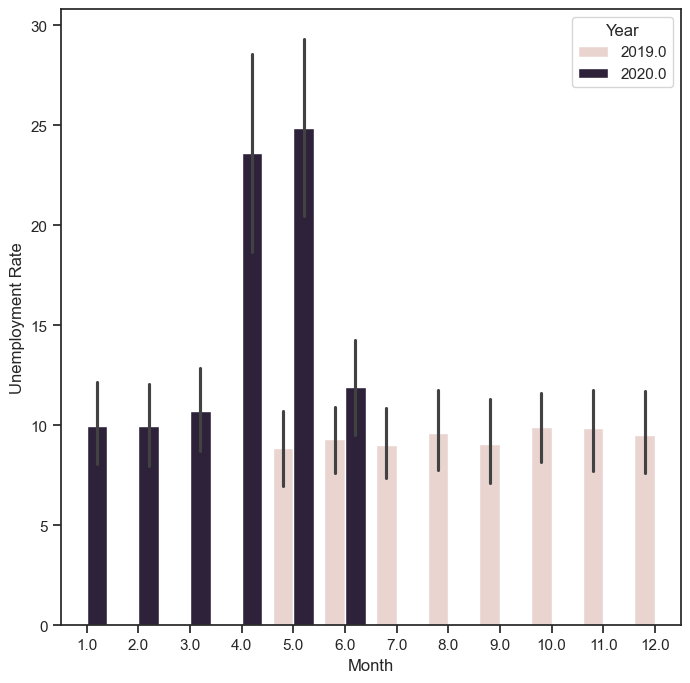

In [220]:
plt.figure(figsize=(8,8))
sns.barplot(x='Month',y='Unemployment Rate',hue='Year',data=df)

In [207]:
df.Day.unique()

array([31., 30., 29., nan])

<Axes: xlabel='Day', ylabel='Unemployment Rate'>

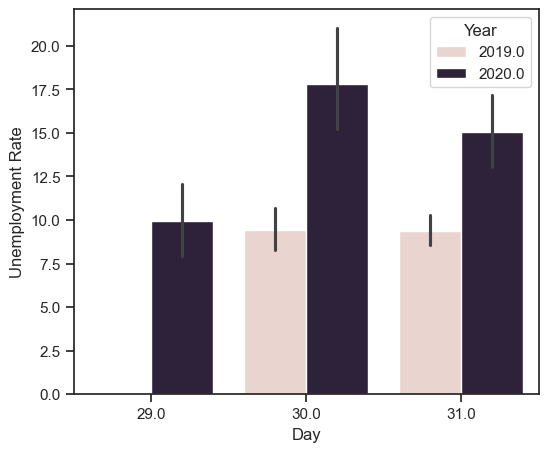

In [221]:
plt.figure(figsize=(6,5))
sns.barplot(x='Day',y='Unemployment Rate',hue='Year',data=df)

C:\Users\Kavisha\AppData\Local\Temp\ipykernel_14020\2040464483.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Kavisha\AppData\Local\Temp\ipykernel_14020\2040464483.py:5: UserWarning:


The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.



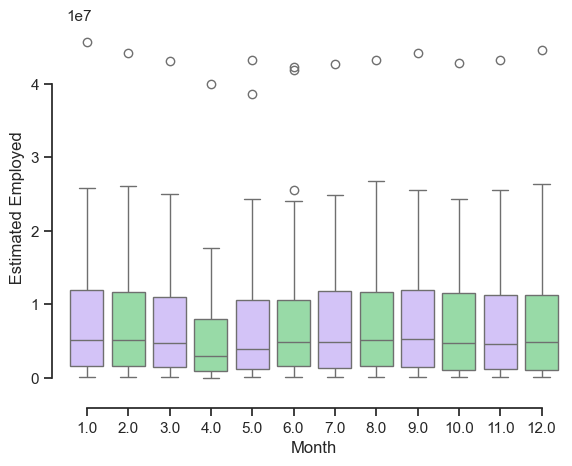

In [228]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Month", y=' Estimated Employed', palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

In [210]:
df.drop('Year',axis=1)

,Region,Date,Frequency,Unemployment Rate,Estimated Employed,Labor Force,Area,Day,Month
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,31.0,5.0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,30.0,6.0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,31.0,7.0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,31.0,8.0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,30.0,9.0
...,...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban,29.0,2.0
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban,31.0,3.0
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban,30.0,4.0
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban,31.0,5.0


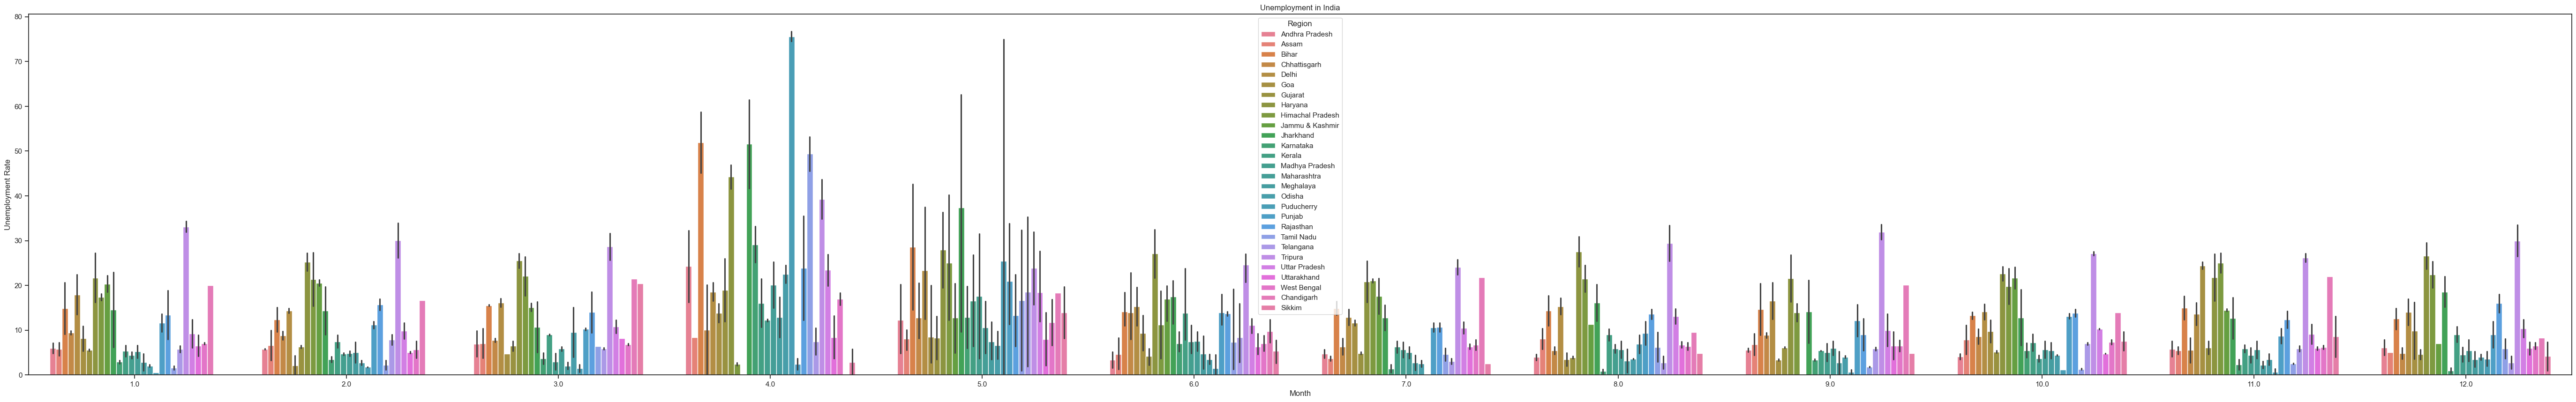

In [211]:
plt.figure(figsize=(70,10))
plt.title("Unemployment in India")
sns.barplot(x='Month',y ='Unemployment Rate',hue='Region', data=df)
plt.show()

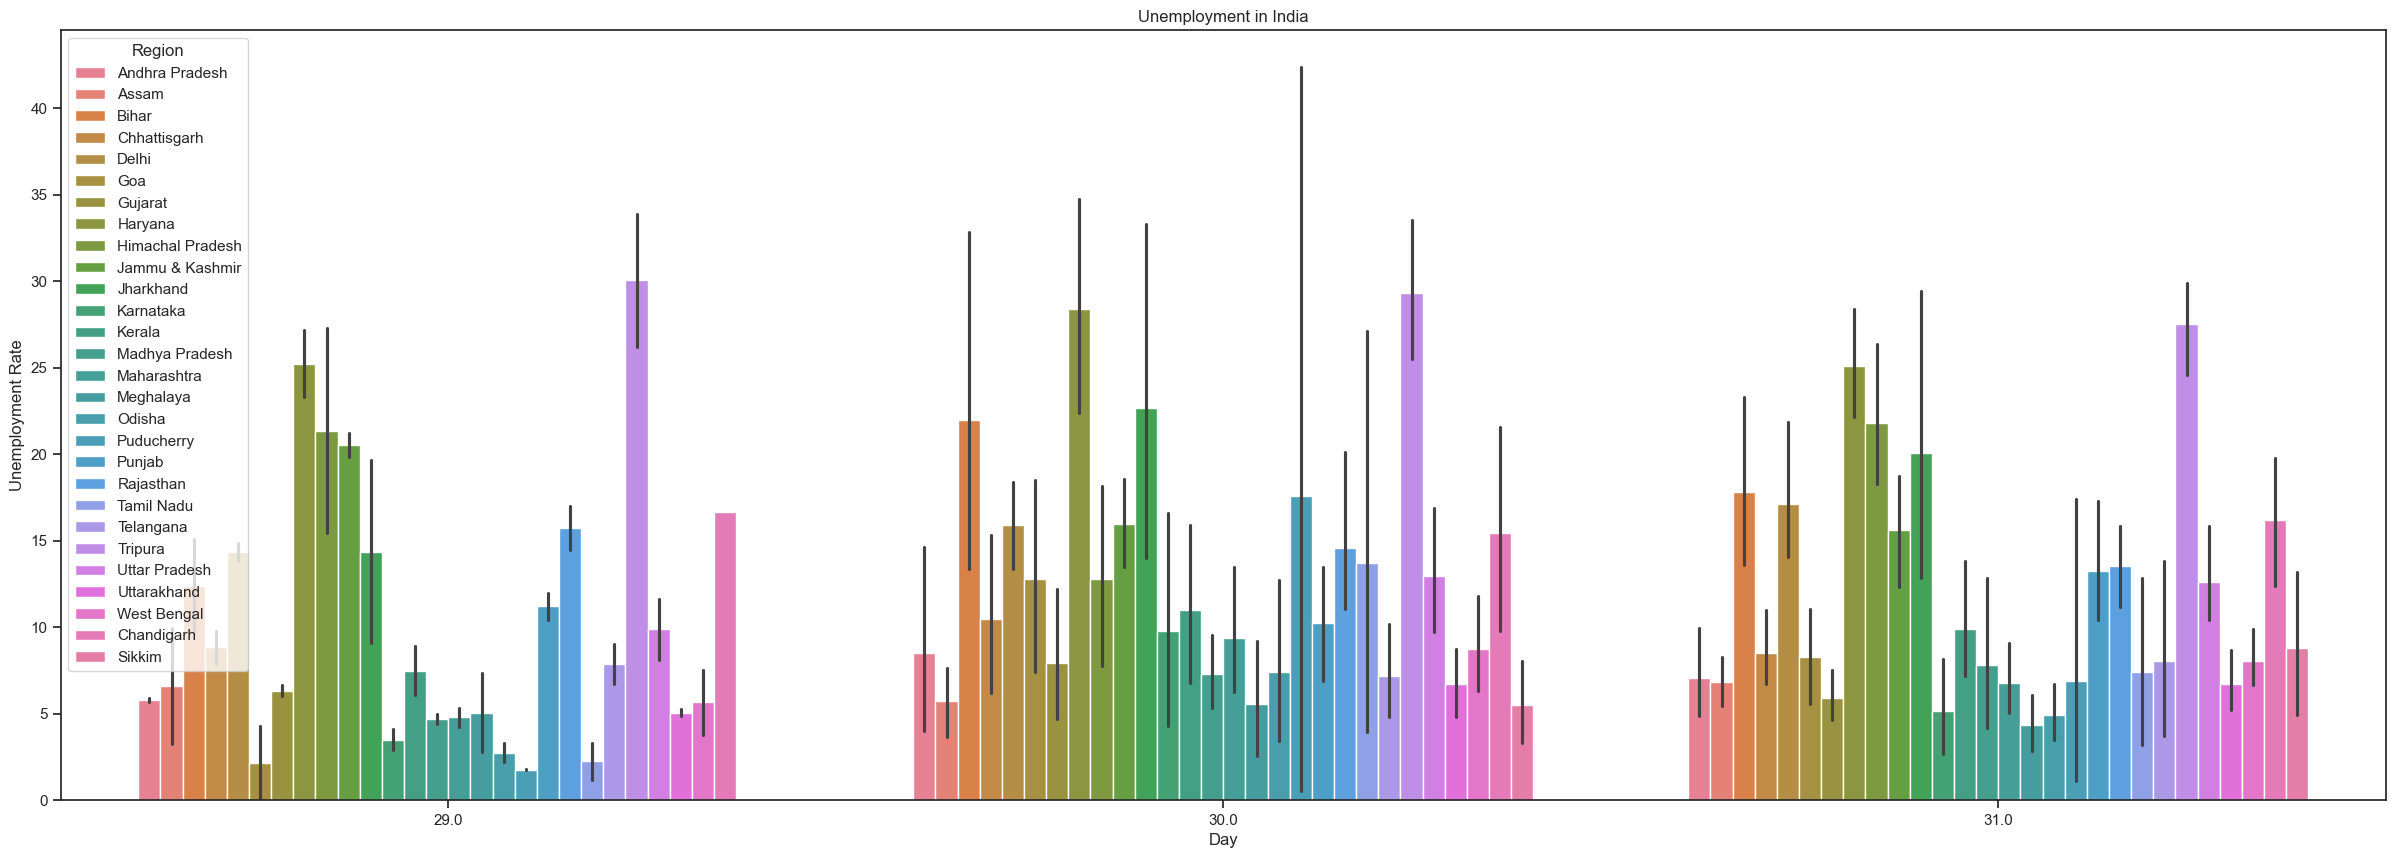

In [212]:
plt.figure(figsize=(30,10))
plt.title("Unemployment in India")
sns.barplot(x='Day',y ='Unemployment Rate',hue='Region', data=df)
plt.show()

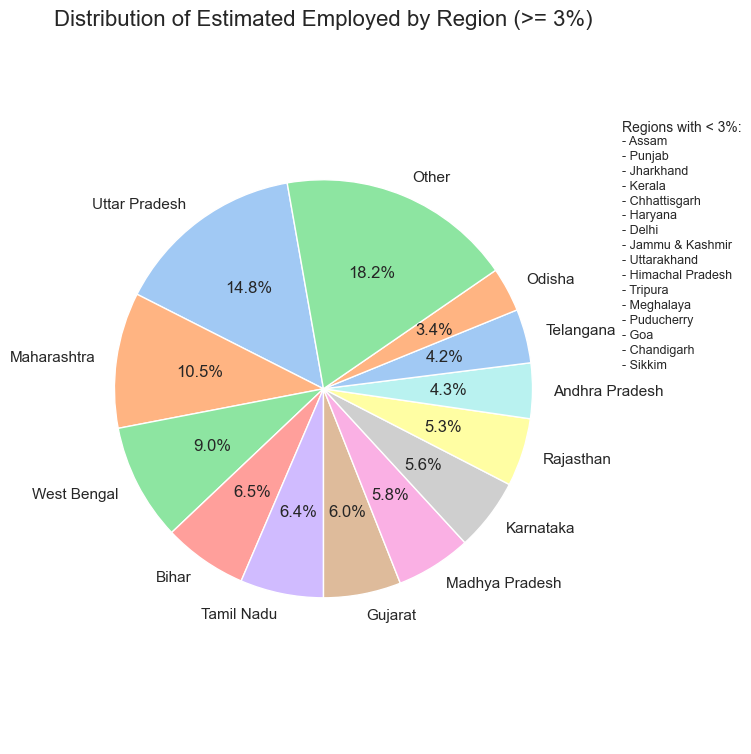

In [222]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total employed and percentages
total_employed = df.groupby('Region')[' Estimated Employed'].sum().sort_values(ascending=False)
total_sum = total_employed.sum()
percentages = total_employed / total_sum * 100

# Identify small and large regions
less_than_3 = percentages[percentages < 3]
greater_equal_3 = percentages[percentages >= 3]

# Prepare pie data
pie_data = greater_equal_3.copy()
if less_than_3.sum() > 0:
    pie_data['Other'] = less_than_3.sum()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=100, labeldistance=1.1, radius=0.7)
plt.title('Distribution of Estimated Employed by Region (>= 3%)', fontsize=16)
plt.axis('equal')

# Add text annotation for regions less than 3%
text_x = 1.0
text_y = 0.9
y_offset = 0.05
plt.text(text_x, text_y, "Regions with < 3%:", fontsize=10, verticalalignment='top')
for region in less_than_3.index:
    text_y -= y_offset
    plt.text(text_x, text_y, f"- {region}", fontsize=9, verticalalignment='top')

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()